In [1]:
import os
import numpy as np
import pandas as pd
from scipy import stats

import mar
import preprocessing

In [3]:
pat_num = 14

In [4]:
data_dir = os.path.join(os.path.dirname(os.getcwd()), "data")
output_dir = os.path.join(os.path.dirname(os.getcwd()), "output")

if not os.path.exists(os.path.join(data_dir, f'Patient{pat_num}')):
    os.makedirs(os.path.join(data_dir, f'Patient{pat_num}'))

if not os.path.exists(os.path.join(output_dir, f'Patient{pat_num}')):
    os.makedirs(os.path.join(output_dir, f'Patient{pat_num}'))

In [5]:
mar_data = preprocessing.load_mar_data(data_dir, pat_num)
sickbay_data = preprocessing.load_sickbay_data(data_dir, pat_num)
# sbs_data = preprocessing.load_retro_data(data_dir, pat_num, ignore_default=True)
accel_data = preprocessing.load_accel_data(data_dir, pat_num)
# ecg_data = preprocessing.load_ecg_data(data_dir, pat_num)

In [12]:
print(mar_data['time'][0])
print(mar_data['time'][len(mar_data['time'])-1])

print(sickbay_data['time'][0])
print(sickbay_data['time'][len(sickbay_data['time'])-1])

print(accel_data['time'][0])
print(accel_data['time'][len(accel_data['time'])-1])

2024-02-08 17:30:00
2024-03-08 18:18:00
2024-02-10 11:10:01
2024-02-22 13:14:57
2024-02-10 11:00:00
2024-02-22 13:26:14


In [24]:
from tqdm import tqdm

pat_nums = [2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 15, 20, 21, 22, 23, 24, 25, 26]

df = pd.DataFrame(columns=['pat_num', 'mar_start', 'mar_end', 'sickbay_start', 'sickbay_end', 'accel_start', 'accel_end'])

for pat_num in tqdm(pat_nums):
    try:
        mar_data = preprocessing.load_mar_data(data_dir, pat_num)
    except:
        mar_data = pd.DataFrame({'time': [np.nan]})

    try:
        sickbay_data = preprocessing.load_sickbay_data(data_dir, pat_num)
    except:
        sickbay_data = pd.DataFrame({'time': [np.nan]})
    
    try:
        accel_data = preprocessing.load_accel_data(data_dir, pat_num)
    except:
        accel_data = pd.DataFrame({'time': [np.nan]})

    row = [pat_num, mar_data['time'][0], mar_data['time'][len(mar_data['time'])-1], sickbay_data['time'][0], sickbay_data['time'][len(sickbay_data['time'])-1], accel_data['time'][0], accel_data['time'][len(accel_data['time'])-1]]
    row = np.array(row)
    row = pd.DataFrame(row.reshape(1, -1), columns=df.columns)
    df = pd.concat([df, row], ignore_index=True)

    # print(f"Patient{pat_num}:")

    # print(mar_data['time'][0])
    # print(mar_data['time'][len(mar_data['time'])-1])

    # print(sickbay_data['time'][0])
    # print(sickbay_data['time'][len(sickbay_data['time'])-1])

    # print(accel_data['time'][0])
    # print(accel_data['time'][len(accel_data['time'])-1])

    # print("")

print(df)

df.to_csv(os.path.join(output_dir, 'times.csv'), index=False)

100%|██████████| 19/19 [12:59<00:00, 41.04s/it]

   pat_num           mar_start             mar_end        sickbay_start  \
0        2 2023-10-26 10:30:00 2023-10-31 18:08:00  2023-10-27 12:00:00   
1        3 2023-10-18 07:30:00 2023-12-17 09:23:00  2023-11-03 16:15:00   
2        4 2023-11-01 20:53:00 2023-12-08 09:31:00  2023-11-13 18:00:01   
3        5 2023-09-11 13:39:00 2024-01-26 08:28:00  2023-11-14 09:15:00   
4        6 2023-11-24 02:14:00 2023-12-08 20:00:00                  NaN   
5        8 2023-12-04 22:27:00 2023-12-17 09:51:00  2023-12-12 15:30:01   
6        9 2024-01-11 01:48:00 2024-02-07 09:40:00  2024-01-15 13:00:00   
7       11 2024-01-18 10:20:00 2024-02-13 12:11:00  2024-01-22 14:30:01   
8       12 2024-01-18 18:49:00 2024-03-17 09:00:00  2024-02-02 08:50:00   
9       13 2024-01-25 22:26:00 2024-03-12 09:00:00  2024-02-04 14:30:01   
10      14 2024-02-08 17:30:00 2024-03-08 18:18:00  2024-02-10 11:10:01   
11      15 2024-02-06 17:47:00 2024-02-27 09:42:00  2024-02-15 15:30:00   
12      20 2024-04-24 09:

Patient2: 


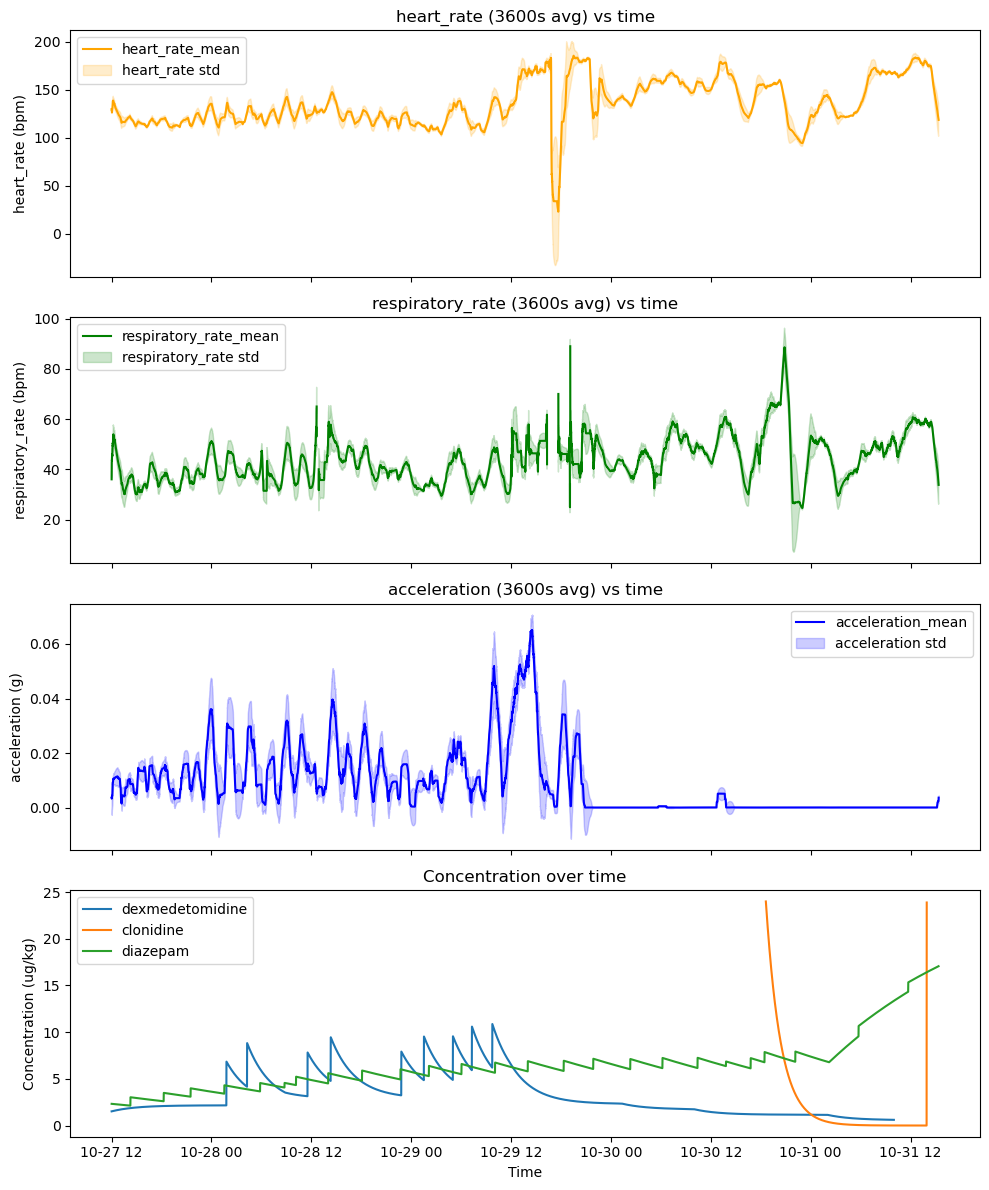

Patient3: 


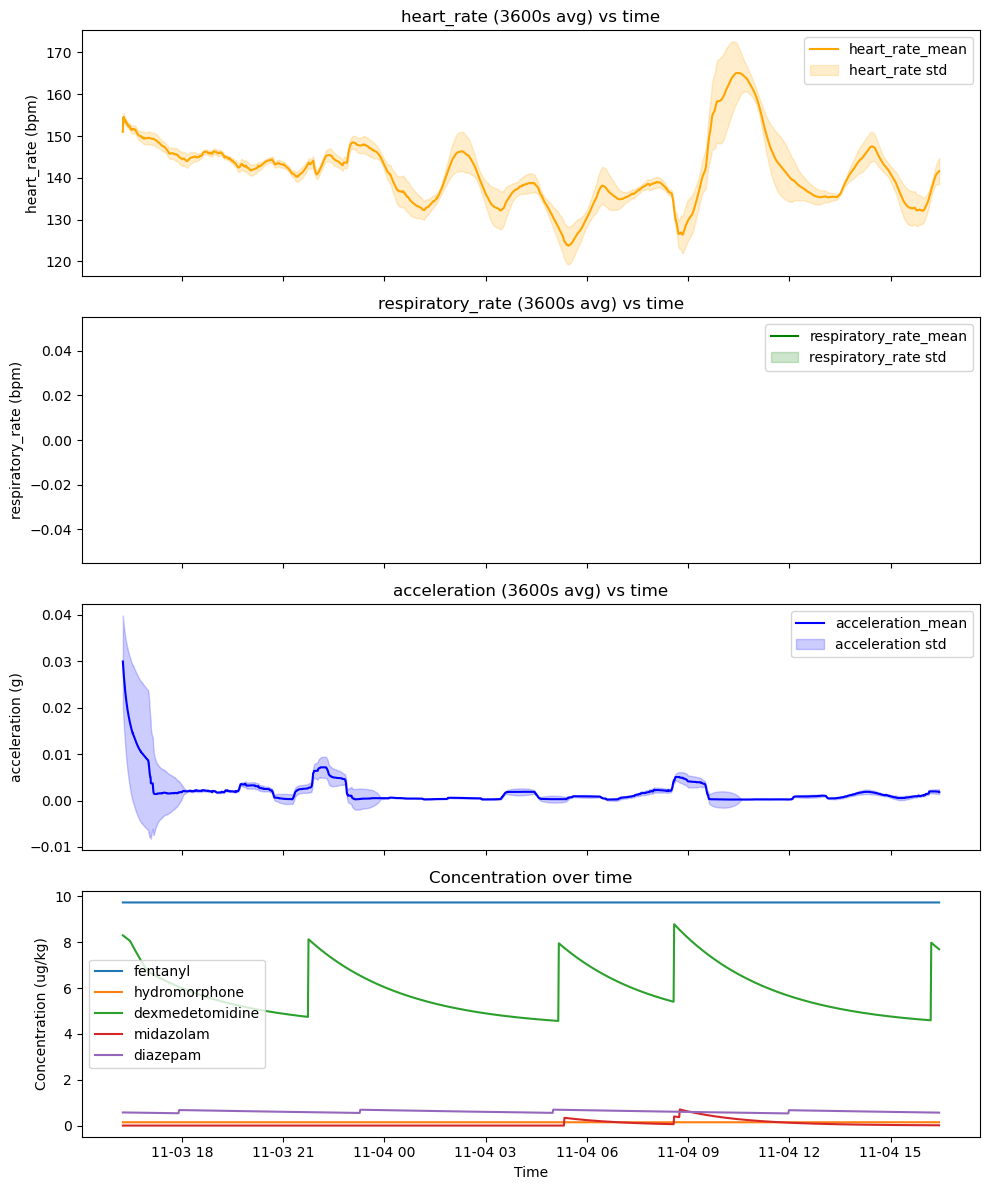

Patient4: 


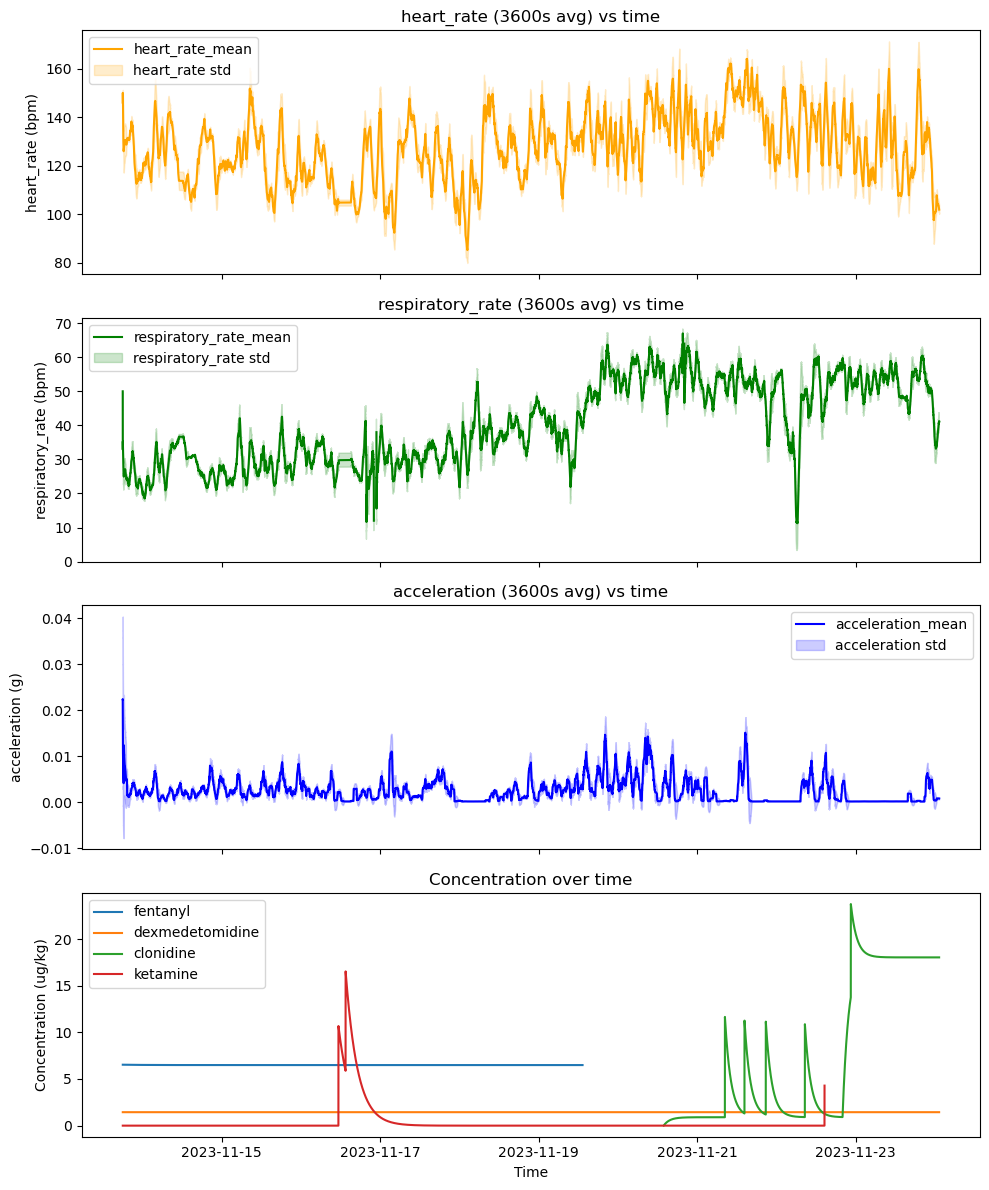

Patient5: 


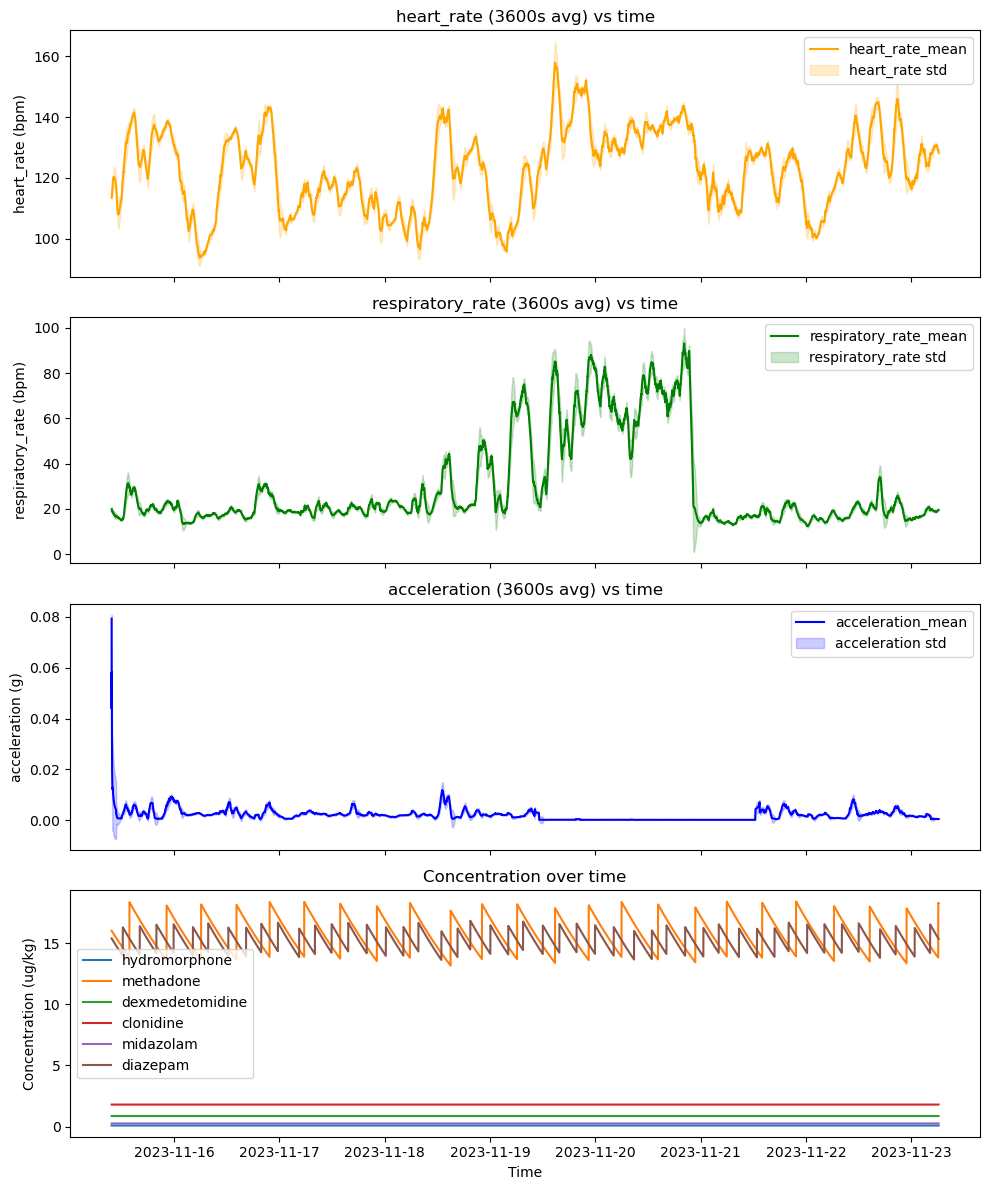

Patient8: 


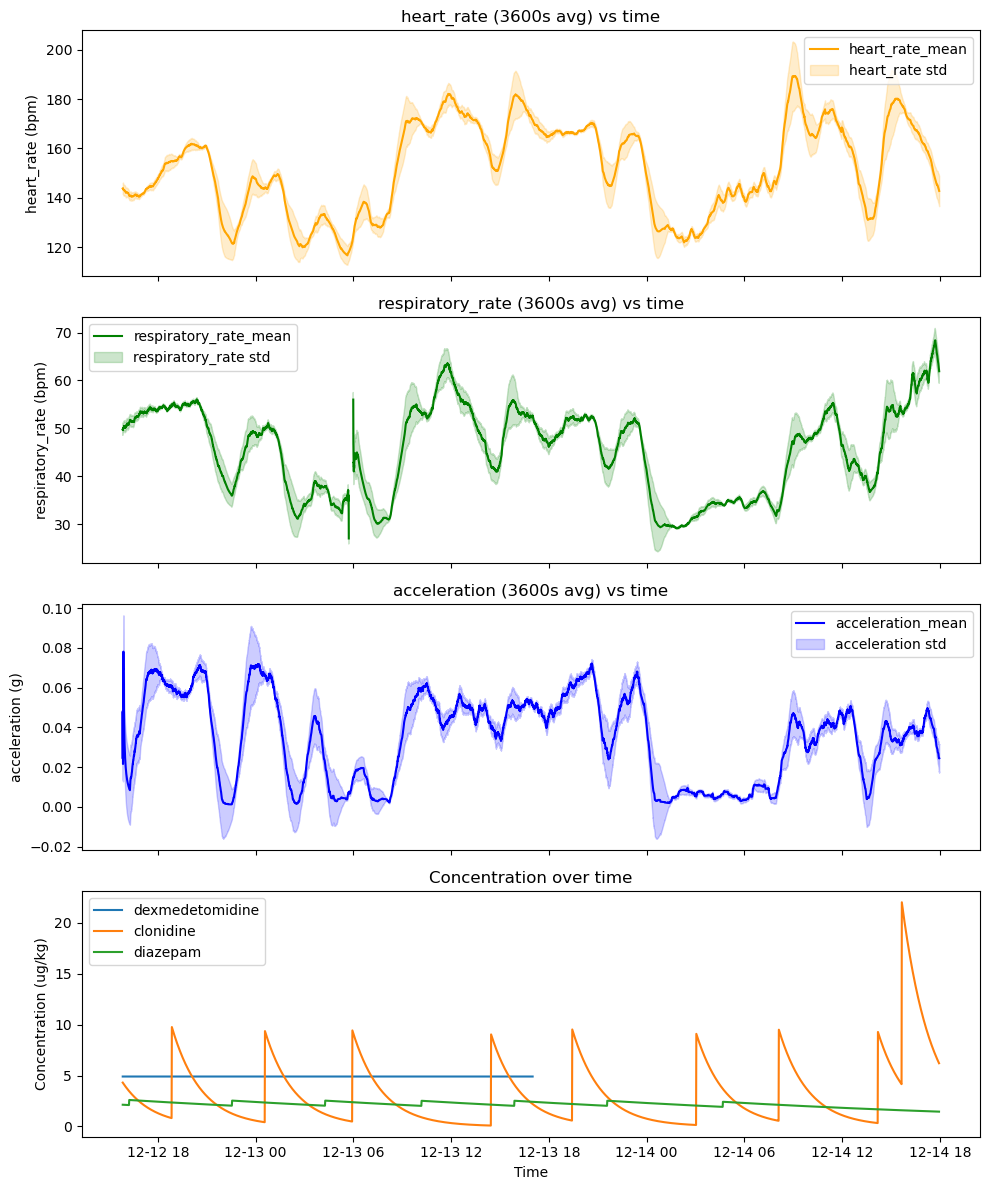

Patient9: 


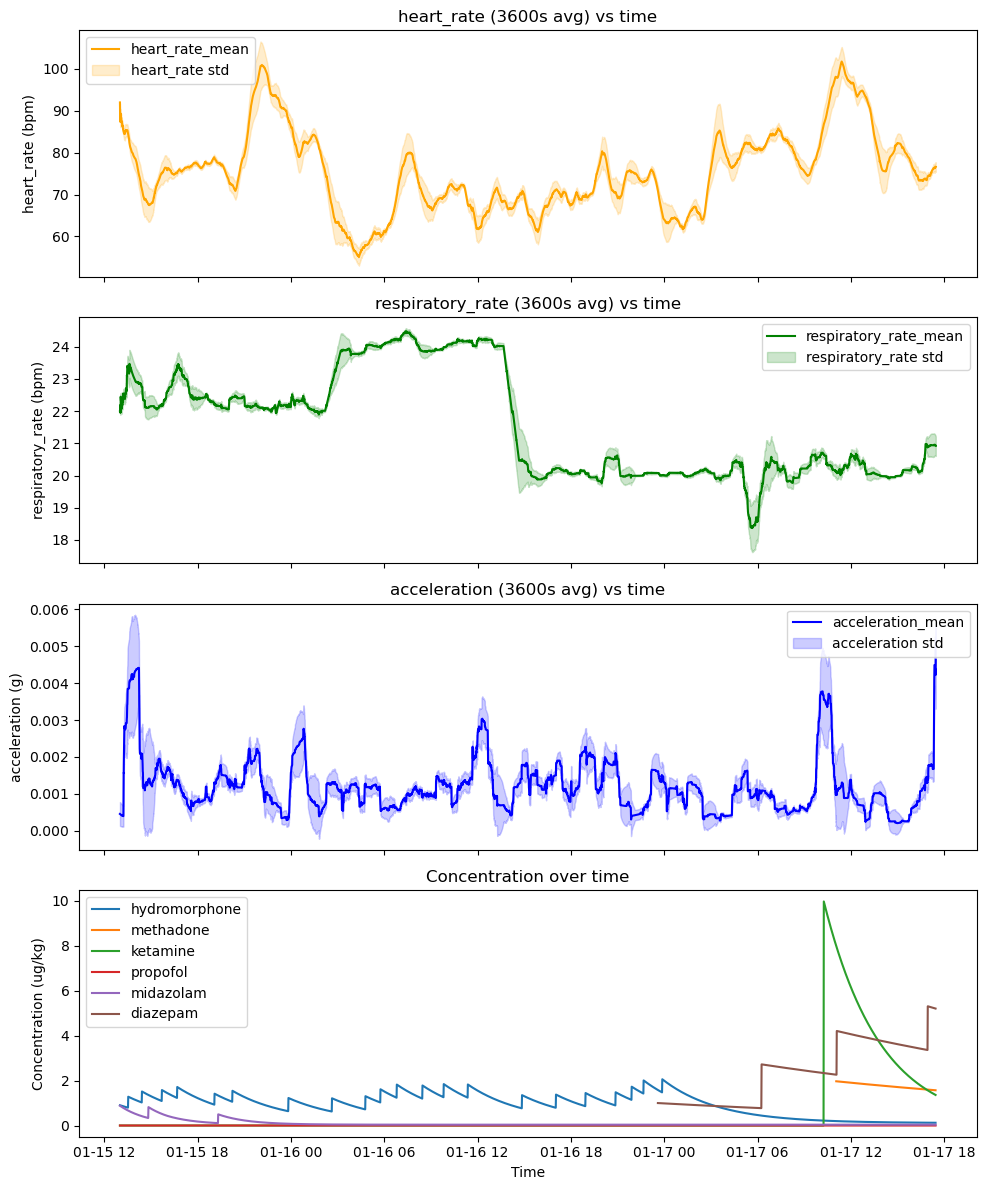

Patient11: 


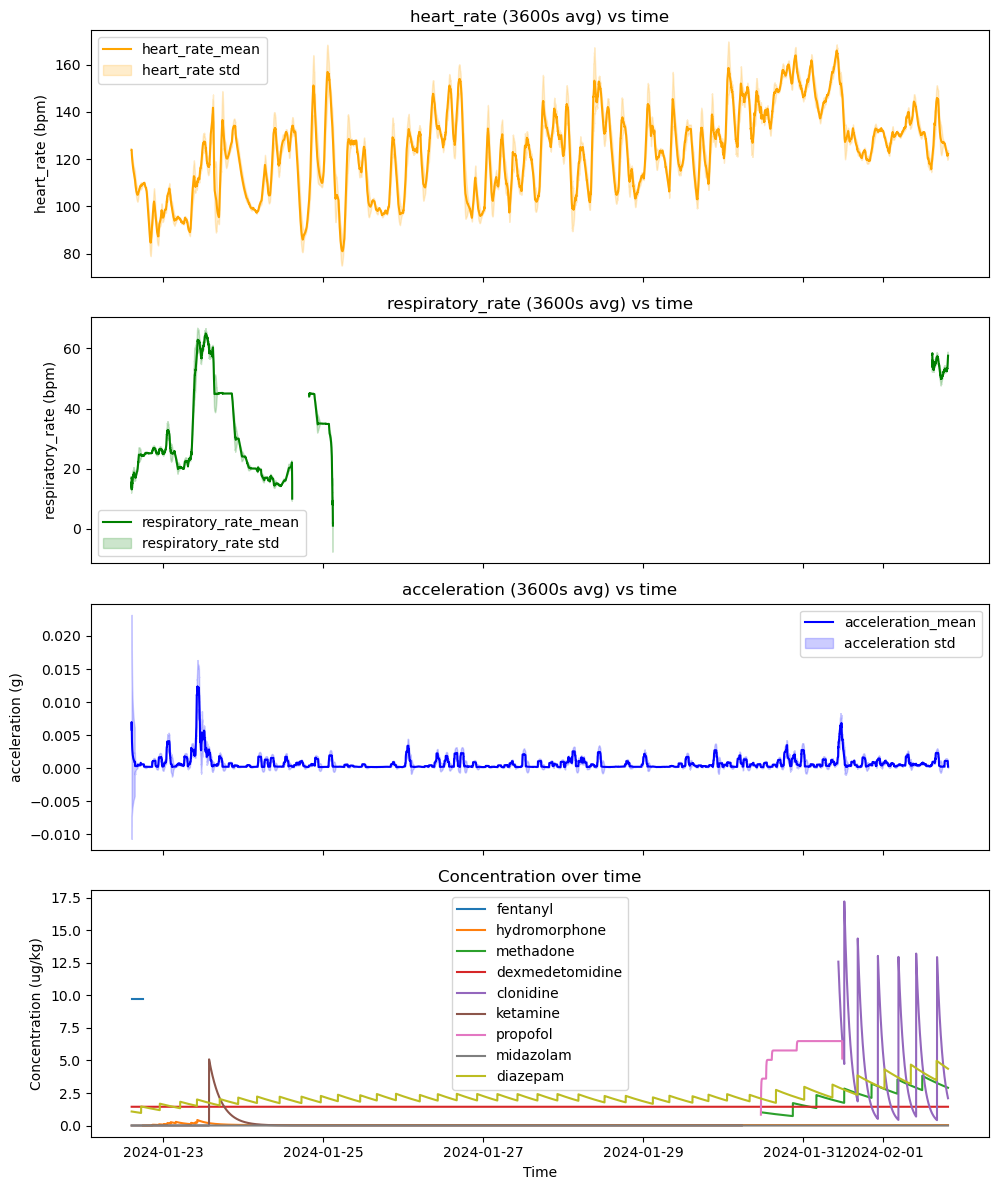

Patient12: 


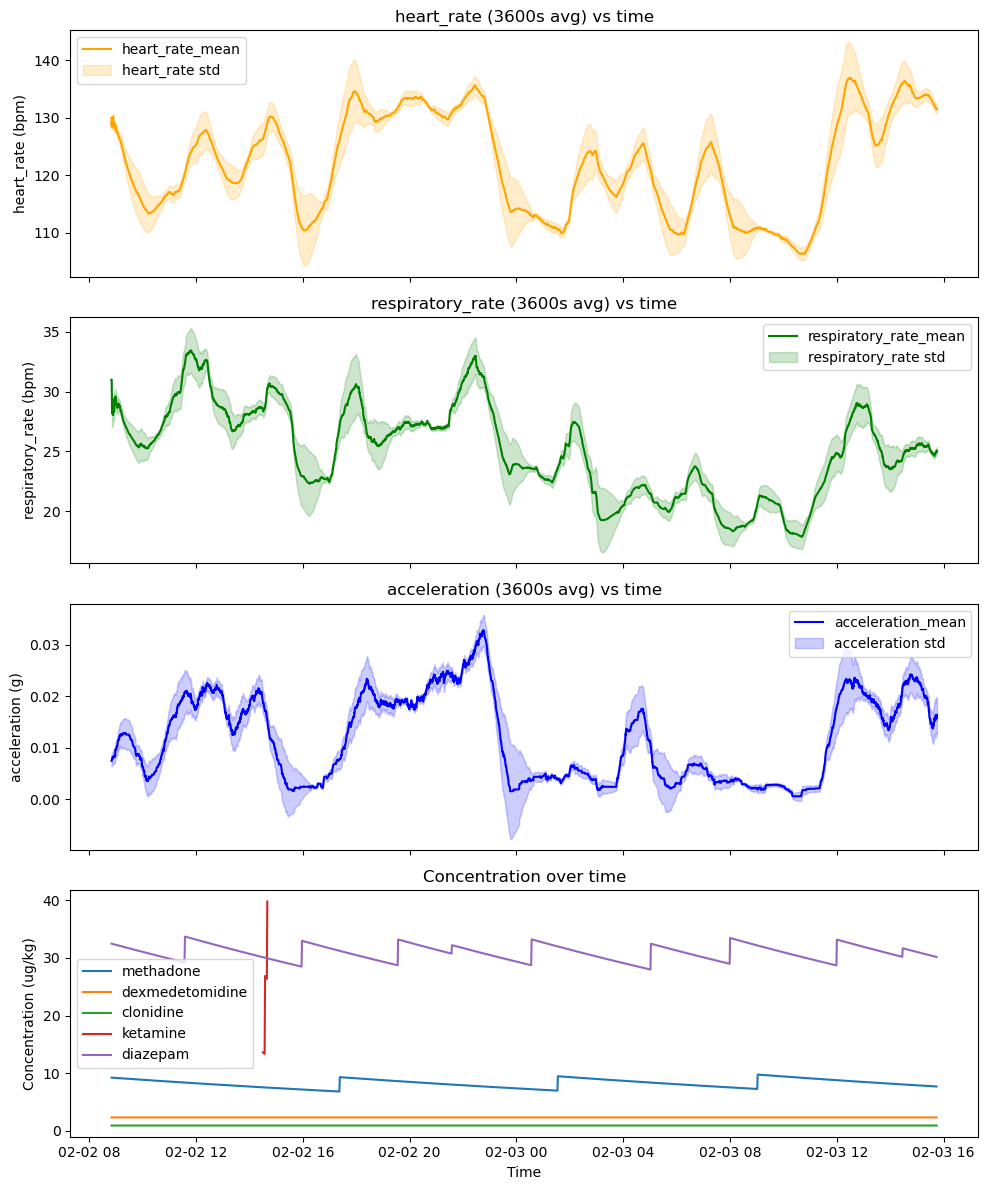

Patient13: 


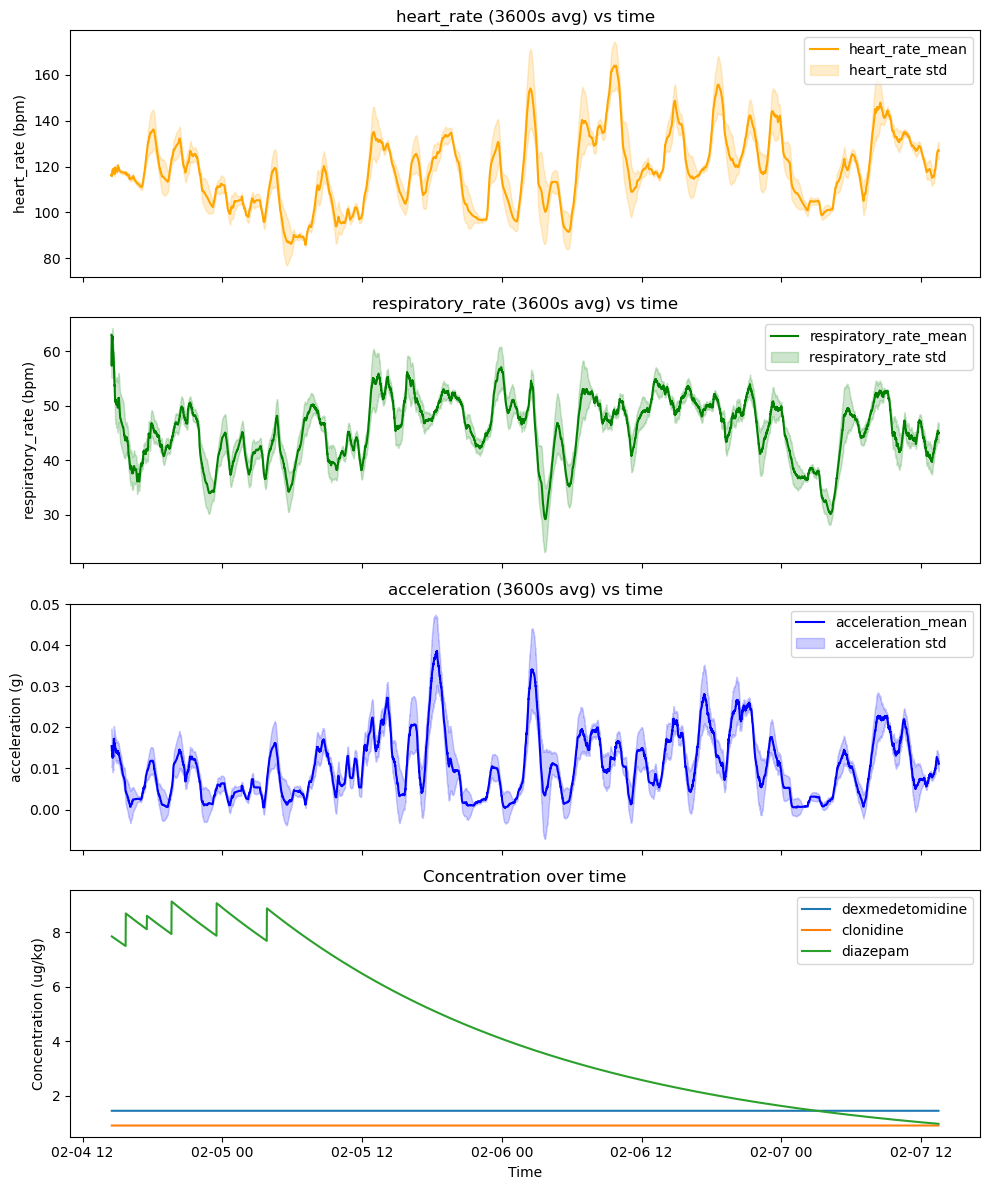

Patient14: 


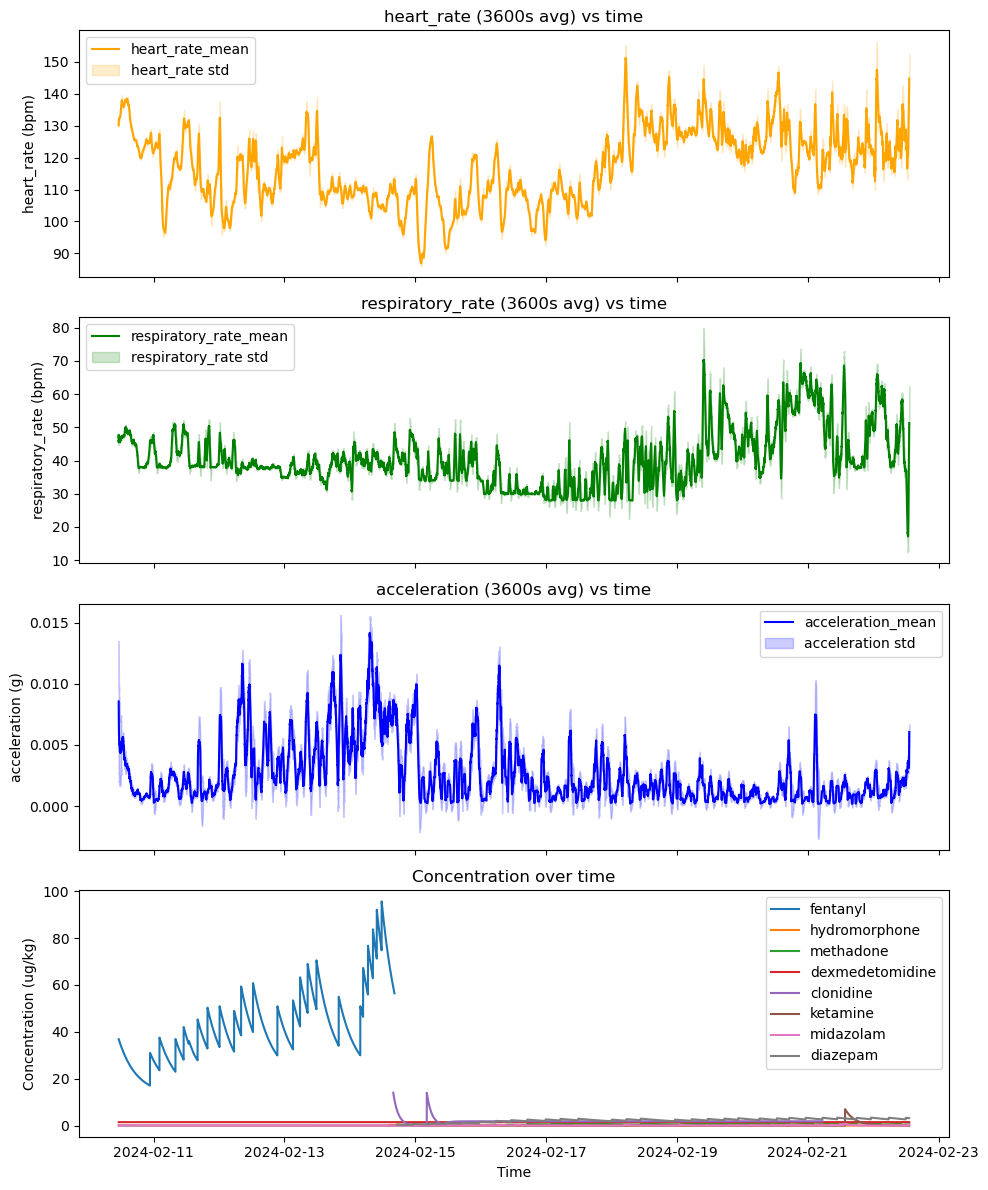

Patient20: 


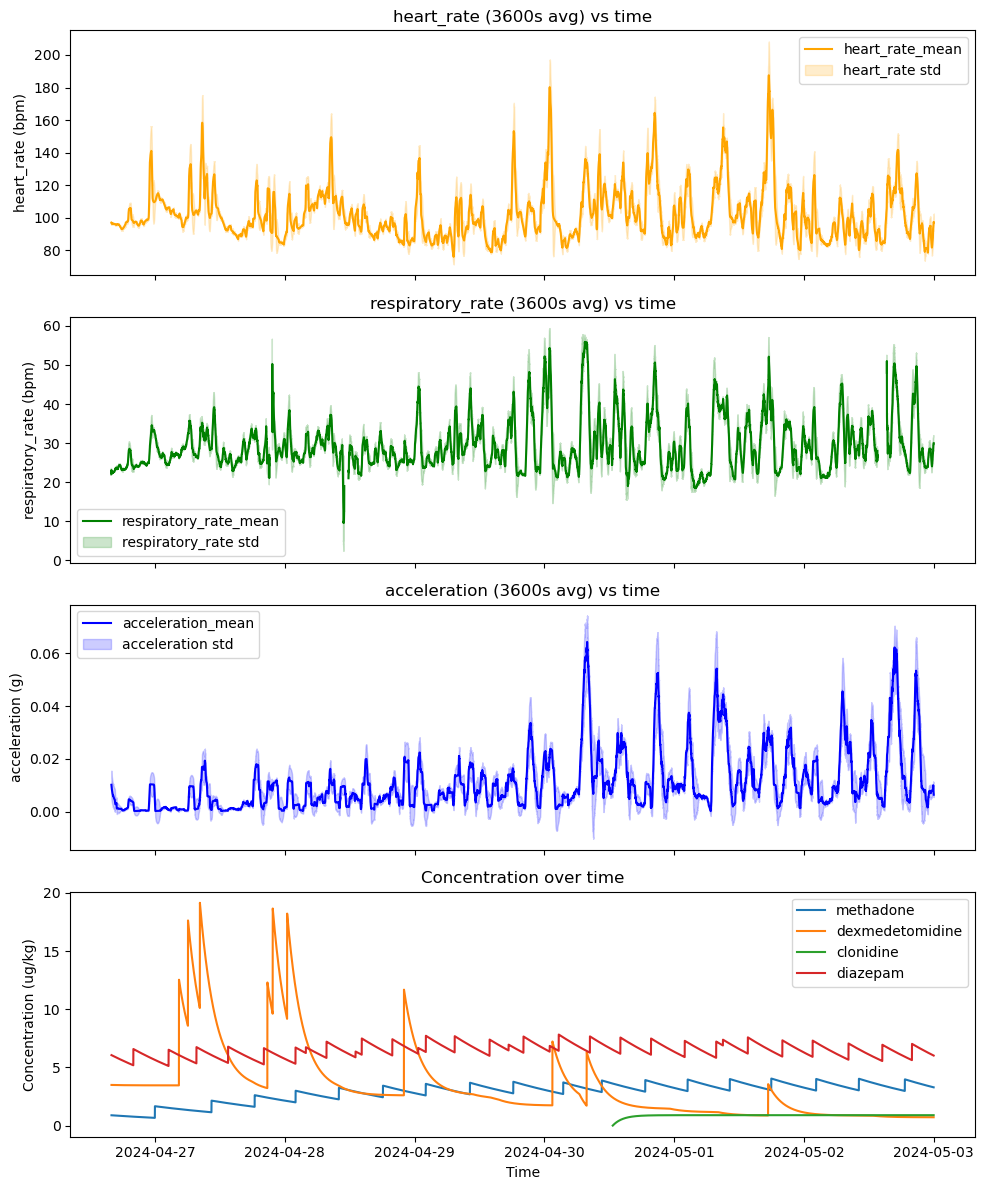

Patient22: 


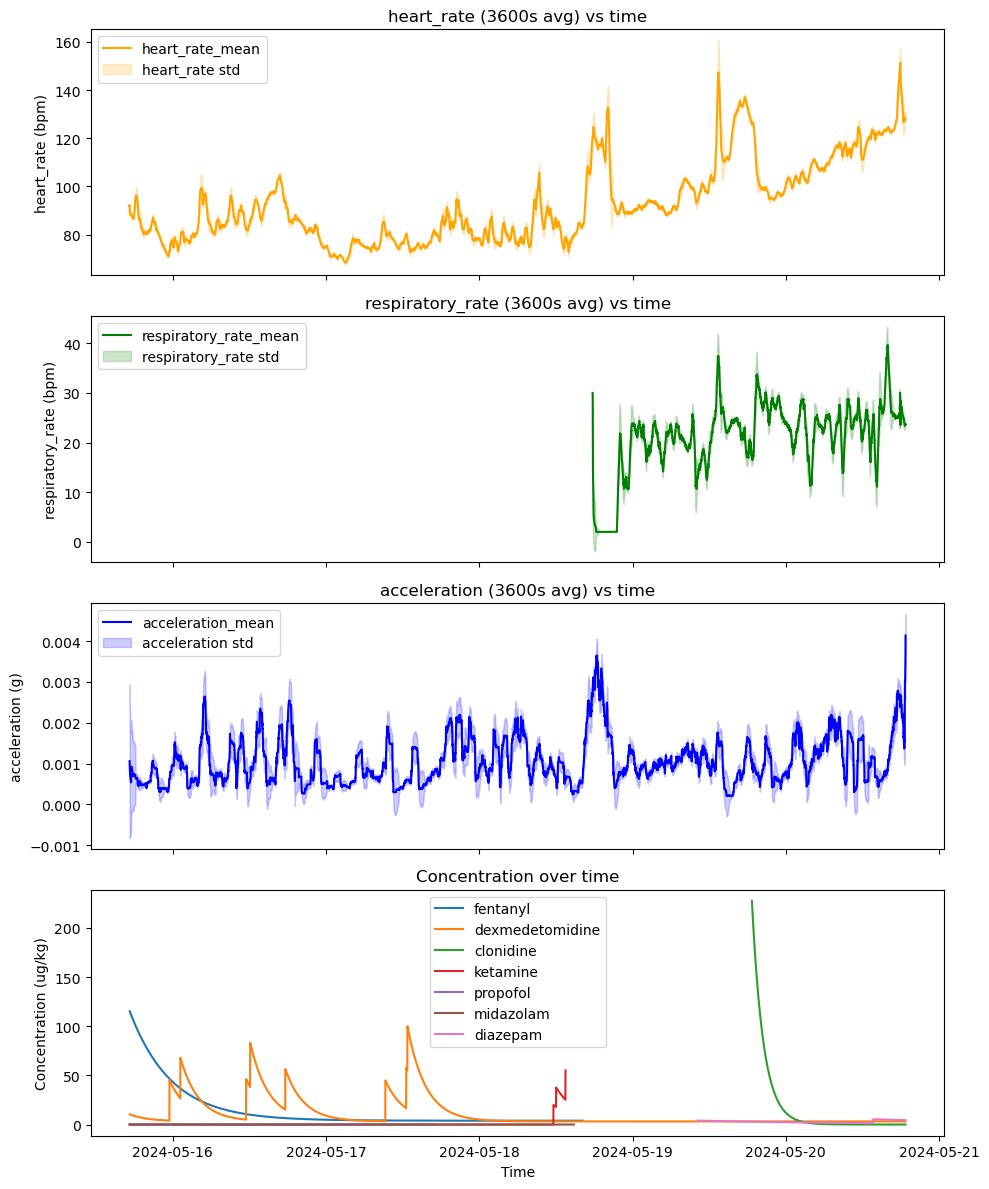

Patient23: 


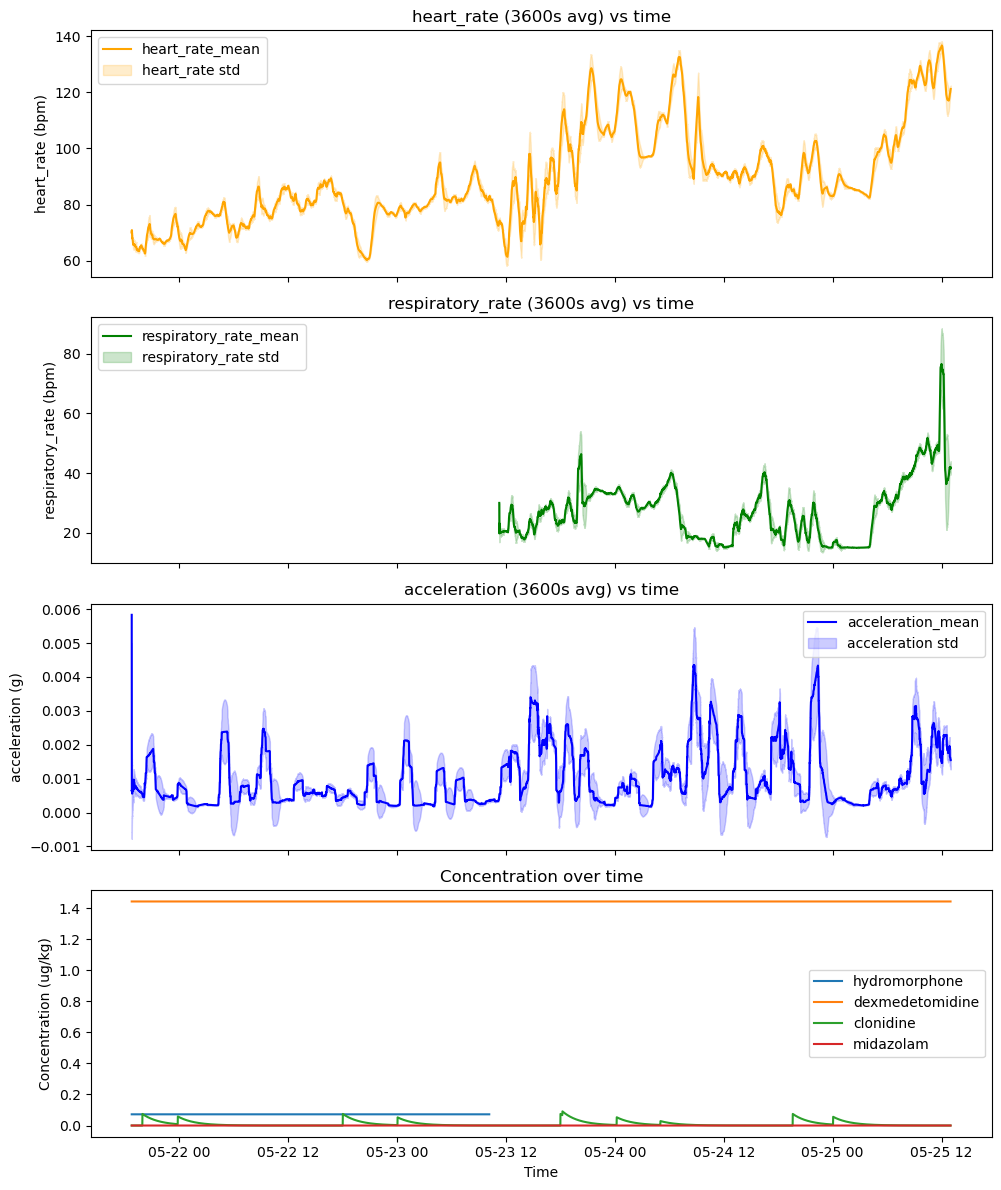

In [25]:
pat_nums = [2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 15, 20, 21, 22, 23, 24, 25, 26]

df = pd.DataFrame(columns=['pat_num', 'mar_start', 'mar_end', 'sickbay_start', 'sickbay_end', 'accel_start', 'accel_end'])

for pat_num in pat_nums:
    try:
        mar_data = preprocessing.load_mar_data(data_dir, pat_num)
        sickbay_data = preprocessing.load_sickbay_data(data_dir, pat_num)
        accel_data = preprocessing.load_accel_data(data_dir, pat_num)
    except:
        continue

    mar_narcotics, mar_paralytics, mar_alpha_agonists, mar_ketamines, mar_propofols, mar_etomidates, mar_benzodiazepines = mar.filter_mar(mar_data)
    mar_classes = {'narcotics': mar_narcotics, 'paralytics': mar_paralytics, 'alpha_agonists': mar_alpha_agonists, 'ketamines': mar_ketamines, 'propofols': mar_propofols, 'etomidates': mar_etomidates, 'benzodiazepines': mar_benzodiazepines}

    drug_doses = {}
    drug_concentrations = {}

    for mar_class in mar_classes:
        if mar_classes[mar_class].shape[0] < 1:
            continue

        for drug_name in mar.classes()[mar_class]:
            drug_df = mar.filter_drug(mar_classes[mar_class], drug_name)
            
            if drug_df.shape[0] < 1:
                continue

            drug_doses[drug_name] = mar.calculate_doses(drug_df)
            drug_concentrations[drug_name] = mar.calculate_concentrations_rk4(drug_doses[drug_name], elimination_rate=mar.elimination_rates()[drug_name])
        
    metrics = {
        'heart_rate': pd.DataFrame({
            'time': sickbay_data['time'],
            'heart_rate': sickbay_data['heart_rate']
        }),
        'respiratory_rate': pd.DataFrame({
            'time': sickbay_data['time'],
            'respiratory_rate': sickbay_data['respiratory_rate']
        }),
        'acceleration': pd.DataFrame({
            'time': accel_data['time'],
            'acceleration': accel_data['a']}),}
    
    start = max([df['time'].min() for df in metrics.values()])
    stop = min([df['time'].max() for df in metrics.values()])

    print(f"Patient{pat_num}: ")

    mar.plot_metrics_and_concentrations(metrics, drug_concentrations, drug_name='all', window=3600, std=True, start=start, stop=stop, show=True, save=None)

In [5]:
mar_narcotics, mar_paralytics, mar_alpha_agonists, mar_ketamines, mar_propofols, mar_etomidates, mar_benzodiazepines = mar.filter_mar(mar_data)
mar_classes = {'narcotics': mar_narcotics, 'paralytics': mar_paralytics, 'alpha_agonists': mar_alpha_agonists, 'ketamines': mar_ketamines, 'propofols': mar_propofols, 'etomidates': mar_etomidates, 'benzodiazepines': mar_benzodiazepines}

for mar_class in mar_classes:
    print(mar_class + " : " + str(mar_classes[mar_class].shape))

narcotics : (1077, 4)
paralytics : (0, 4)
alpha_agonists : (858, 4)
ketamines : (15, 4)
propofols : (0, 4)
etomidates : (0, 4)
benzodiazepines : (631, 4)


In [6]:
drug_doses = {}
drug_concentrations = {}

for mar_class in mar_classes:
    if mar_classes[mar_class].shape[0] < 1:
        continue

    for drug_name in mar.classes()[mar_class]:
        drug_df = mar.filter_drug(mar_classes[mar_class], drug_name)
        
        if drug_df.shape[0] < 1:
            continue

        print(drug_name + " : " + str(drug_df.shape))

        drug_doses[drug_name] = mar.calculate_doses(drug_df)
        drug_concentrations[drug_name] = mar.calculate_concentrations_rk4(drug_doses[drug_name], elimination_rate=mar.elimination_rates()[drug_name])

print("")

for drug_name in drug_doses:
    print(drug_name + " : " + str(drug_doses[drug_name].shape))

fentanyl : (190, 4)
hydromorphone : (815, 4)
methadone : (72, 4)
dexmedetomidine : (854, 4)
clonidine : (4, 4)
ketamine : (15, 4)
midazolam : (520, 4)
diazepam : (111, 4)

fentanyl : (8480, 4)
hydromorphone : (33375, 4)
methadone : (30702, 4)
dexmedetomidine : (41809, 4)
clonidine : (9451, 4)
ketamine : (25854, 4)
midazolam : (41572, 4)
diazepam : (33133, 4)


In [ ]:
metrics = {
    'heart_rate': pd.DataFrame({
        'time': sickbay_data['time'],
        'heart_rate': sickbay_data['heart_rate']
    }),
    'respiratory_rate': pd.DataFrame({
        'time': sickbay_data['time'],
        'respiratory_rate': sickbay_data['respiratory_rate']
    }),
    'acceleration': pd.DataFrame({
        'time': accel_data['time'],
        'acceleration': accel_data['a']}),}

In [8]:
start = max([df['time'].min() for df in metrics.values()])
stop = min([df['time'].max() for df in metrics.values()])

print(start)
print(stop)

2024-02-10 11:10:01
2024-02-22 13:14:57


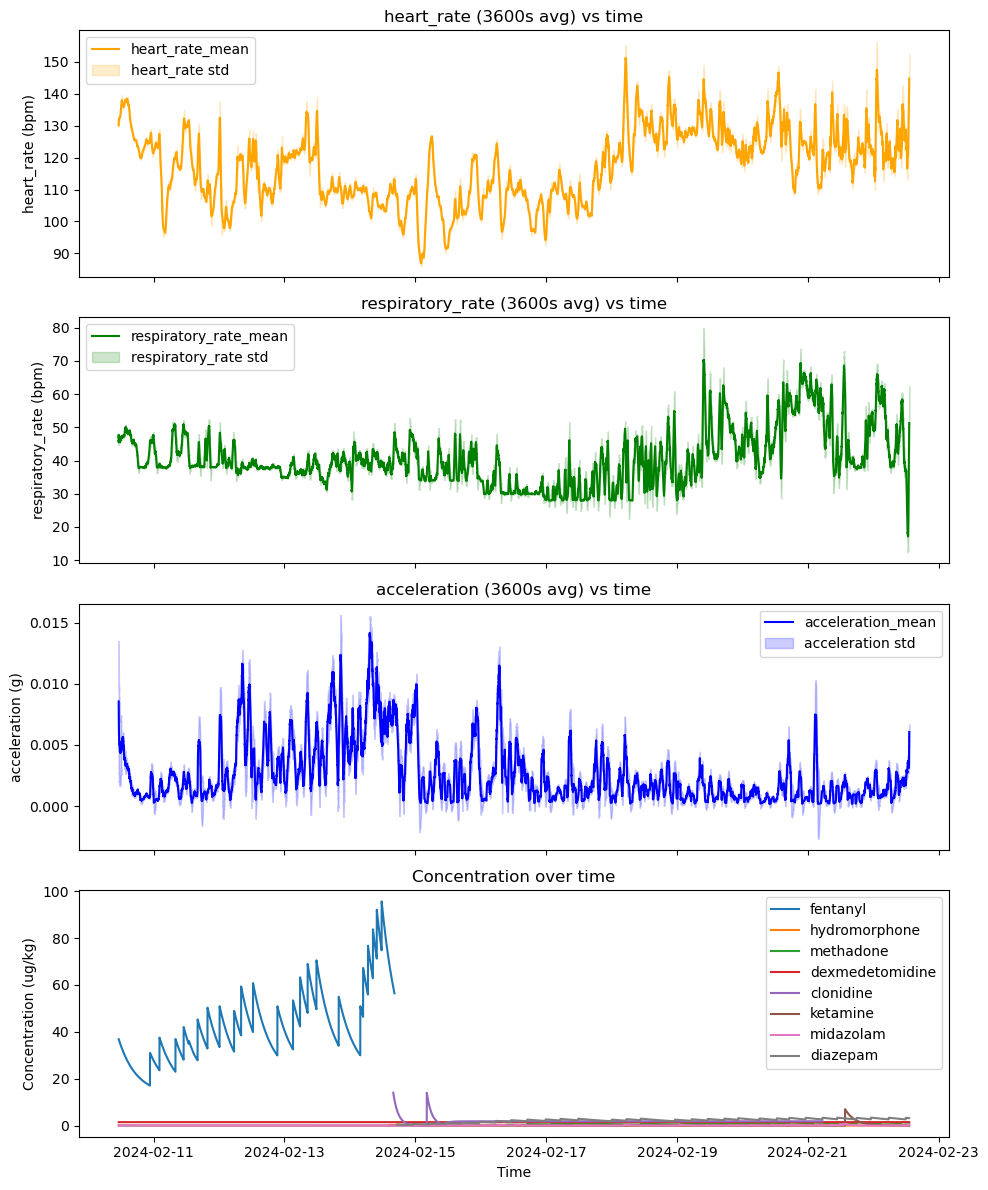

In [9]:
mar.plot_metrics_and_concentrations(metrics, drug_concentrations, drug_name='all', window=3600, std=True, start=start, stop=stop, show=True, save=None)

In [10]:
drug = 'fentanyl'

drug_df = drug_doses[drug]
drug_df = drug_df[(drug_df['time'] >= pd.to_datetime(start)) & (drug_df['time'] <= pd.to_datetime(stop))].reset_index(drop=True)
drug_df = drug_df[drug_df['bolus_dose'] != 0].reset_index(drop=True)

# print(drug_df)

In [11]:
times, doses = [], []

hr_means_before = []
hr_vars_before = []
hr_means_after = []
hr_vars_after = []

rr_means_before = []
rr_vars_before = []
rr_means_after = []
rr_vars_after = []

a_means_before = []
a_vars_before = []
a_means_after = []
a_vars_after = []

for i in range(len(drug_df)):
    time = drug_df.iloc[i, 0]
    dose = drug_df.iloc[i, 3]

    hr = metrics['heart_rate']
    hr_before = hr[(hr['time'] >= pd.to_datetime(time) - pd.Timedelta(minutes=30)) & (hr['time'] <= pd.to_datetime(time))].reset_index(drop=True)
    hr_after = hr[(hr['time'] >= pd.to_datetime(time)) & (hr['time'] <= pd.to_datetime(time) + pd.Timedelta(minutes=30))].reset_index(drop=True)
    
    rr = metrics['respiratory_rate']
    rr_before = rr[(rr['time'] >= pd.to_datetime(time) - pd.Timedelta(minutes=30)) & (rr['time'] <= pd.to_datetime(time))].reset_index(drop=True)
    rr_after = rr[(rr['time'] >= pd.to_datetime(time)) & (rr['time'] <= pd.to_datetime(time) + pd.Timedelta(minutes=30))].reset_index(drop=True)

    a = metrics['acceleration']
    a_before = a[(a['time'] >= pd.to_datetime(time) - pd.Timedelta(minutes=30)) & (a['time'] <= pd.to_datetime(time))].reset_index(drop=True)
    a_after = a[(a['time'] >= pd.to_datetime(time)) & (a['time'] <= pd.to_datetime(time) + pd.Timedelta(minutes=30))].reset_index(drop=True)

    times.append(time)
    doses.append(dose)

    hr_means_before.append(np.mean(hr_before['heart_rate']))
    hr_vars_before.append(np.var(hr_before['heart_rate']))
    hr_means_after.append(np.mean(hr_after['heart_rate']))
    hr_vars_after.append(np.var(hr_after['heart_rate']))

    rr_means_before.append(np.mean(rr_before['respiratory_rate']))
    rr_vars_before.append(np.var(rr_before['respiratory_rate']))
    rr_means_after.append(np.mean(rr_after['respiratory_rate']))
    rr_vars_after.append(np.var(rr_after['respiratory_rate']))

    a_means_before.append(np.mean(a_before['acceleration']))
    a_vars_before.append(np.var(a_before['acceleration']))
    a_means_after.append(np.mean(a_after['acceleration']))
    a_vars_after.append(np.var(a_after['acceleration']))

df = pd.DataFrame({
    'time': times,
    'dose': doses,
    'hr_mean_before': hr_means_before,
    'hr_var_before': hr_vars_before,
    'hr_mean_after': hr_means_after,
    'hr_var_after': hr_vars_after,
    'rr_mean_before': rr_means_before,
    'rr_var_before': rr_vars_before,
    'rr_mean_after': rr_means_after,
    'rr_var_after': rr_vars_after,
    'a_mean_before': a_means_before,
    'a_var_before': a_vars_before,
    'a_mean_after': a_means_after,
    'a_var_after': a_vars_after,})

# display(df)

In [12]:
print(drug)

delta = np.mean(df['hr_mean_after'] - df['hr_mean_before'])
t_statistic, p_value = stats.ttest_rel(df['hr_mean_before'], df['hr_mean_after'], alternative='greater')

print(f"Change in heart rate mean: {delta}")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}\n")

delta = np.mean(df['hr_var_after'] - df['hr_var_before'])
t_statistic, p_value = stats.ttest_rel(df['hr_var_before'], df['hr_var_after'], alternative='greater')

print(f"Change in heart rate variance: {delta}")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}\n")

delta = np.mean(df['rr_mean_after'] - df['rr_mean_before'])
t_statistic, p_value = stats.ttest_rel(df['rr_mean_before'], df['rr_mean_after'], alternative='greater')

print(f"Change in respiratory rate mean: {delta}")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}\n")

delta = np.mean(df['rr_var_after'] - df['rr_var_before'])
t_statistic, p_value = stats.ttest_rel(df['rr_var_before'], df['rr_var_after'], alternative='greater')

print(f"Change in respiratory rate variance: {delta}")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}\n")

delta = np.mean(df['a_mean_after'] - df['a_mean_before'])
t_statistic, p_value = stats.ttest_rel(df['a_mean_before'], df['a_mean_after'], alternative='greater')

print(f"Change in accelerometry mean: {delta}")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}\n")

delta = np.mean(df['a_var_after'] - df['a_var_before'])
t_statistic, p_value = stats.ttest_rel(df['a_var_before'], df['a_var_after'], alternative='greater')

print(f"Change in accelerometry variance: {delta}")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}\n")

fentanyl
Change in heart rate mean: 1.3144230204983252
T-statistic: -1.8708910823137115
P-value: 0.9623194869616629

Change in heart rate variance: 1.1868484100992094
T-statistic: -1.0687301970904375
P-value: 0.851338547969301

Change in respiratory rate mean: 0.36384238809312336
T-statistic: -0.6508250573727521
P-value: 0.738891238000857

Change in respiratory rate variance: 0.10277881877848549
T-statistic: -0.2125828341449615
P-value: 0.5831488395564072

Change in accelerometry mean: 0.0006834557538609842
T-statistic: -1.8135850706193832
P-value: 0.9579704059517723

Change in accelerometry variance: 1.3972511680821348e-08
T-statistic: -0.06791425537768199
P-value: 0.5267518099621692

